<a href="https://colab.research.google.com/github/Theosagie/Classification/blob/main/Predicting_the_Presence_of_Diabetes_using_Neural_Networks_and_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
                                                          #TASK 1- CLASSIFICATION               

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [ ]:


fileName ='/content/pima-indians-diabetes.data.csv'

In [ ]:
#fileName2 = '/pima-indians-diabetes.data.csv'

In [ ]:
df = pd.read_csv(fileName, header=None)

In [ ]:
names = ['Number of times pregnant','Plasma glucose concentration a 2 hours in an oral glucose tolerance test',
         'Diastolic blood pressure (mm Hg)','Triceps skin fold thickness (mm)','2-Hour serum insulin (mu U/ml)',
        'Body mass index (weight in kg/(height in m)^2)','Diabetes pedigree function','Age (years)',
        'Class variable (0 or 1)']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       768 non-null    int64  
 1   1       768 non-null    int64  
 2   2       768 non-null    int64  
 3   3       768 non-null    int64  
 4   4       768 non-null    int64  
 5   5       768 non-null    float64
 6   6       768 non-null    float64
 7   7       768 non-null    int64  
 8   8       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.columns = names

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Number of times pregnant                                                  768 non-null    int64  
 1   Plasma glucose concentration a 2 hours in an oral glucose tolerance test  768 non-null    int64  
 2   Diastolic blood pressure (mm Hg)                                          768 non-null    int64  
 3   Triceps skin fold thickness (mm)                                          768 non-null    int64  
 4   2-Hour serum insulin (mu U/ml)                                            768 non-null    int64  
 5   Body mass index (weight in kg/(height in m)^2)                            768 non-null    float64
 6   Diabetes pedigree function                                         

In [ ]:
df.describe()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.isna()
#to see the number of  missing values

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [ ]:
df.isna().sum()

Number of times pregnant                                                    0
Plasma glucose concentration a 2 hours in an oral glucose tolerance test    0
Diastolic blood pressure (mm Hg)                                            0
Triceps skin fold thickness (mm)                                            0
2-Hour serum insulin (mu U/ml)                                              0
Body mass index (weight in kg/(height in m)^2)                              0
Diabetes pedigree function                                                  0
Age (years)                                                                 0
Class variable (0 or 1)                                                     0
dtype: int64

In [ ]:
df.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#These columns has some 0 values which are not likely.So the zero values in these columns will be treated as missing values
ColName = ['Plasma glucose concentration a 2 hours in an oral glucose tolerance test',
         'Diastolic blood pressure (mm Hg)','Triceps skin fold thickness (mm)','2-Hour serum insulin (mu U/ml)',
        'Body mass index (weight in kg/(height in m)^2)','Diabetes pedigree function']

In [ ]:
df[ColName] = df [ColName].replace(0, np.nan)

In [ ]:
df.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
df.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
# we have replaced the zero (0) values in specific columns in the dataset with nan. This is because the zero actually suggest empty.
# Only the number of times pregnant and the class tarributes are left to still have zero

In [ ]:
#To rename the column names so that we can reduce the keystrokes

df.rename(columns = {'Number of times pregnant':'Pregnant','Plasma glucose concentration a 2 hours in an oral glucose tolerance test':'Glucose',
         'Diastolic blood pressure (mm Hg)':'BP','Triceps skin fold thickness (mm)':'Skin_Thickness','2-Hour serum insulin (mu U/ml)':'Serum_Insulin',
        'Body mass index (weight in kg/(height in m)^2)':'BMI','Diabetes pedigree function':'Diabetes','Age (years)':'Age',
        'Class variable (0 or 1)':'Result'}, inplace=True)

In [ ]:
df.head()

,Pregnant,Glucose,BP,Skin_Thickness,Serum_Insulin,BMI,Diabetes,Age,Result
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
df.isna().sum()

Pregnant            0
Glucose             5
BP                 35
Skin_Thickness    227
Serum_Insulin     374
BMI                11
Diabetes            0
Age                 0
Result              0
dtype: int64

In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [ ]:
# we can pass the result of the df.duplicated into a set to see if there is any instance of True
set(df.duplicated())

{False}

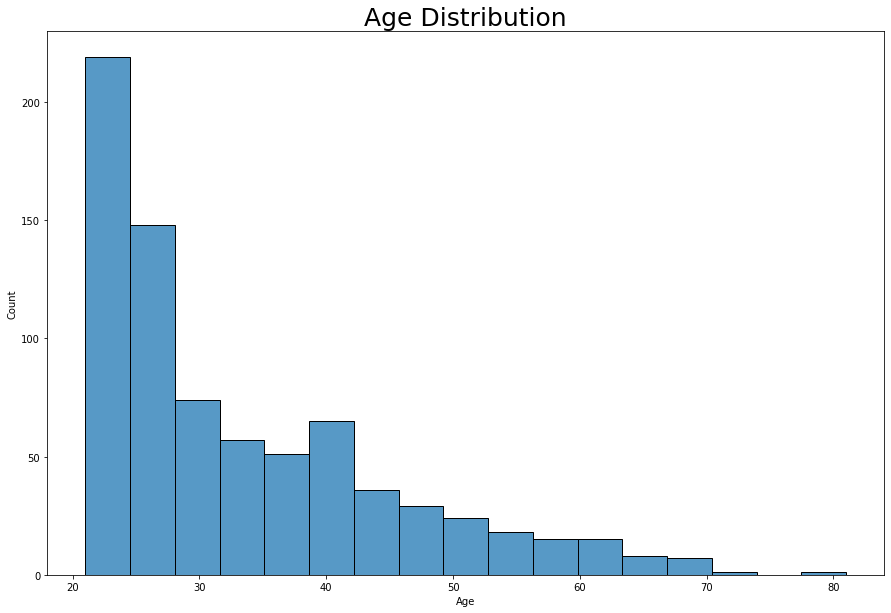

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(df.Age)
plt.title('Age Distribution', fontsize = 25)
plt.show()

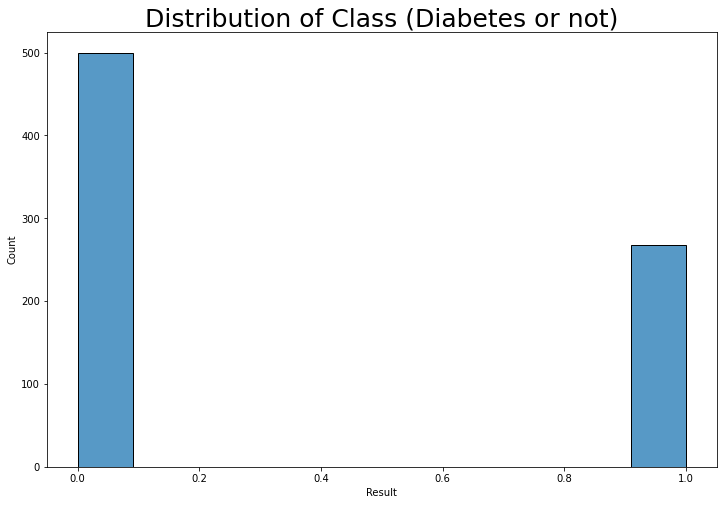

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(df.Result)
plt.title('Distribution of Class (Diabetes or not)', fontsize = 25)
plt.show()

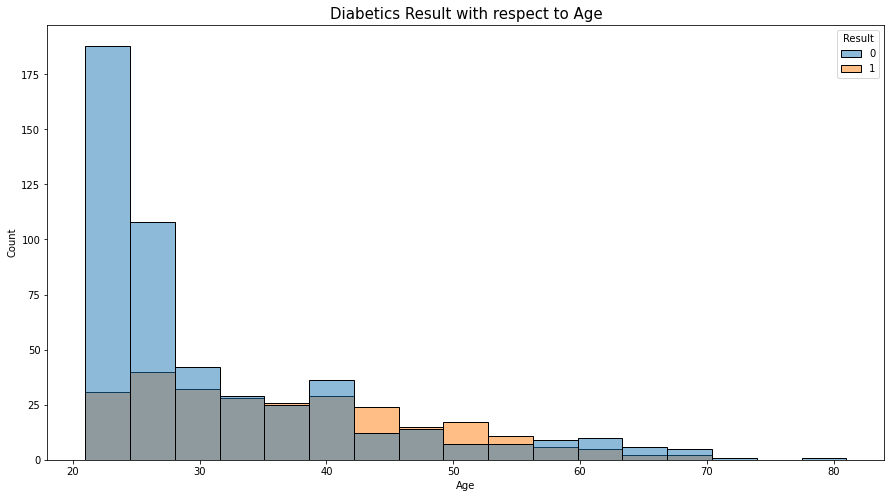

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Diabetics Result with respect to Age', fontsize=15)
sns.histplot(x='Age', hue ='Result', data=df)
plt.show()

In [ ]:
df['Age'].value_counts()

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
46    13
43    13
40    13
39    12
35    10
50     8
51     8
52     8
44     8
58     7
47     6
54     6
49     5
48     5
57     5
53     5
60     5
66     4
63     4
62     4
55     4
67     3
56     3
59     3
65     3
69     2
61     2
72     1
81     1
64     1
70     1
68     1
Name: Age, dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(df[['Glucose','BP','Skin_Thickness','Serum_Insulin','BMI']])
df[['Glucose','BP','Skin_Thickness','Serum_Insulin','BMI']] = imputer.transform(df[['Glucose','BP','Skin_Thickness','Serum_Insulin','BMI']])


In [ ]:
df.head()

,Pregnant,Glucose,BP,Skin_Thickness,Serum_Insulin,BMI,Diabetes,Age,Result
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
df.isna().sum()

Pregnant          0
Glucose           0
BP                0
Skin_Thickness    0
Serum_Insulin     0
BMI               0
Diabetes          0
Age               0
Result            0
dtype: int64

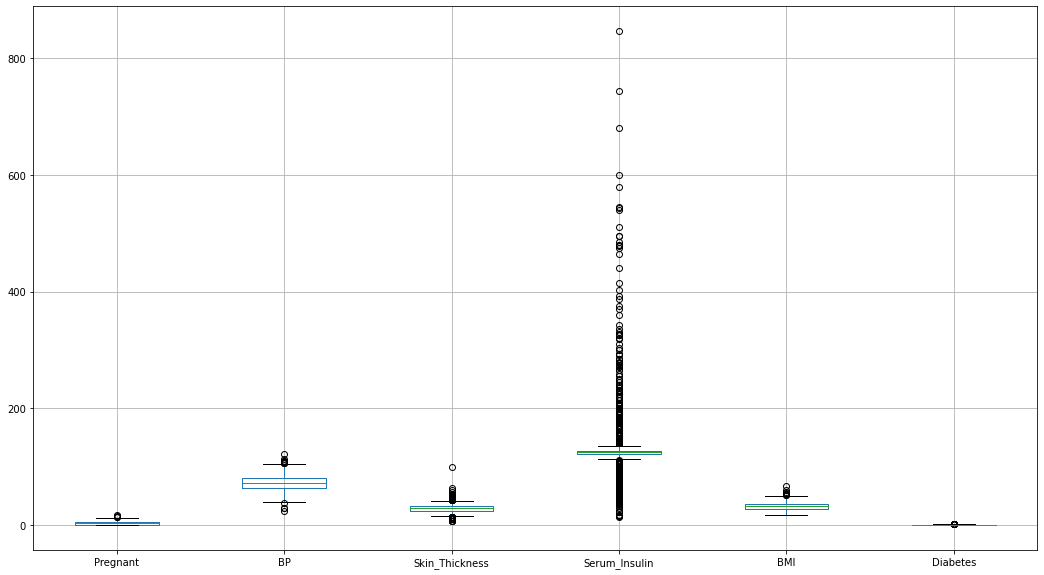

In [ ]:

plt.figure(figsize=(18,10))
df.boxplot(column=['Pregnant','BP','Skin_Thickness','Serum_Insulin','BMI','Diabetes'], return_type='axes')

In [ ]:
# now our data has no missing values, we can ahead to scale our data and train our model. 
# For this we will use KNN as the first model and Neural Networks for the second

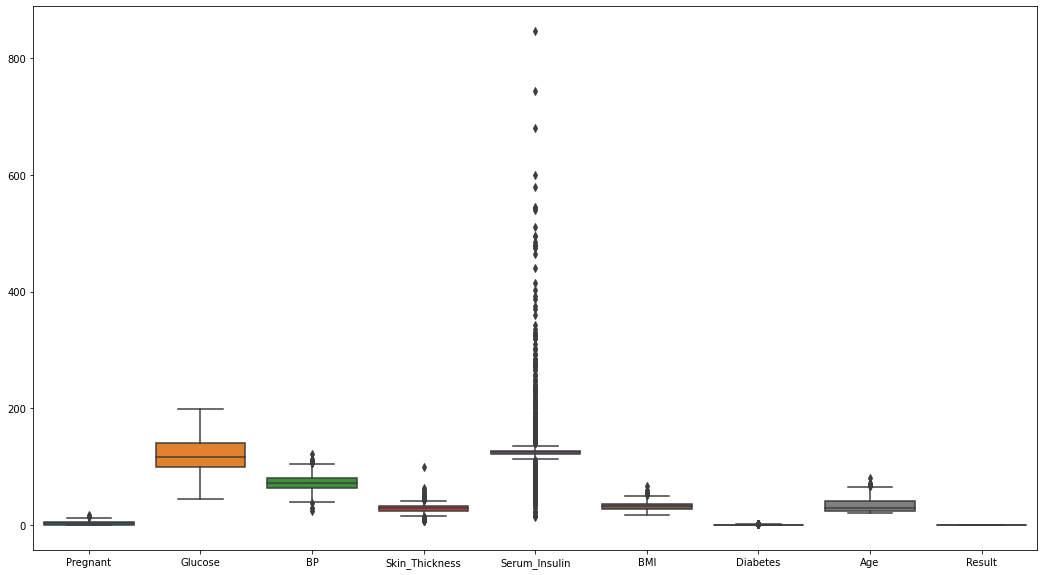

In [ ]:
plt.figure(figsize=(18,10))
sns.boxplot(data=df)

In [ ]:
df['Result'].value_counts(normalize=True)
#We see a case of an imbalance class. 

0    0.651042
1    0.348958
Name: Result, dtype: float64

In [ ]:


#Using KNN for Classification


In [ ]:
# To use index location to slit the input features from the output features
X = df.iloc[:, 0:8].values
y = df.iloc[:, 8].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.3, random_state = 5)

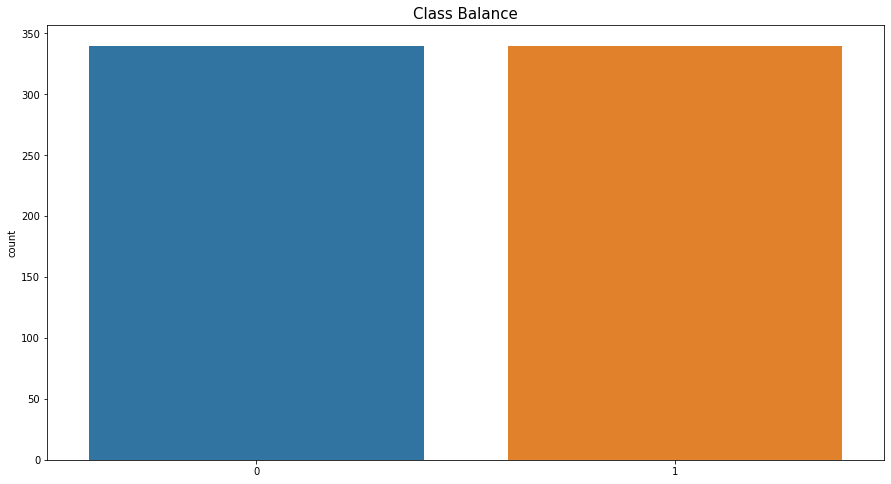

In [ ]:
#To address the concern of class imbalance, we can use oversampling method since the data is not large
from imblearn.over_sampling import RandomOverSampler
resampler = RandomOverSampler(random_state=0)
X_train_oversampled, y_train_oversampled = resampler.fit_resample(X_train, y_train)
plt.figure(figsize=(15,8))
plt.title('Class Balance', fontsize=15)
sns.countplot(x= y_train_oversampled)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train_oversampled)
X_test_sc = scaler.transform (X_test)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
# selector = SelectKBest(f_classif, k=3)
# selector = SelectKBest(f_classif, k=5)
selector = SelectKBest(f_classif, k='all')
X_train_fs = selector.fit_transform(X_train_sc, y_train_oversampled)
X_test_fs = selector.transform(X_test_sc)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model =KNeighborsClassifier(n_neighbors = 3, metric='minkowski', p=2)
model.fit(X_train_fs, y_train_oversampled)
y_prediction = model.predict(X_test_fs)
print(y_prediction)

[1 1 0 0 0 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0
 1 0 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0
 1 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0
 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1
 0 0 1 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0
 0 1 1 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1
 1 1 0 0 1 0 0 0 1]


In [ ]:
from sklearn import metrics
Accuracy = metrics.accuracy_score(y_test, y_prediction)
print('Accuracy score:%.2f\n\n'%(Accuracy))
conf_matrix = metrics.confusion_matrix(y_test, y_prediction)
print('The confusion matrix is:')
print(conf_matrix,'\n\n')
print('---------------------')
result = metrics.classification_report(y_test, y_prediction)
print('Classification Report:\n')
print(result)

Accuracy score:0.70


The confusion matrix is:
[[108  52]
 [ 17  54]] 


---------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.68      0.76       160
           1       0.51      0.76      0.61        71

    accuracy                           0.70       231
   macro avg       0.69      0.72      0.68       231
weighted avg       0.76      0.70      0.71       231



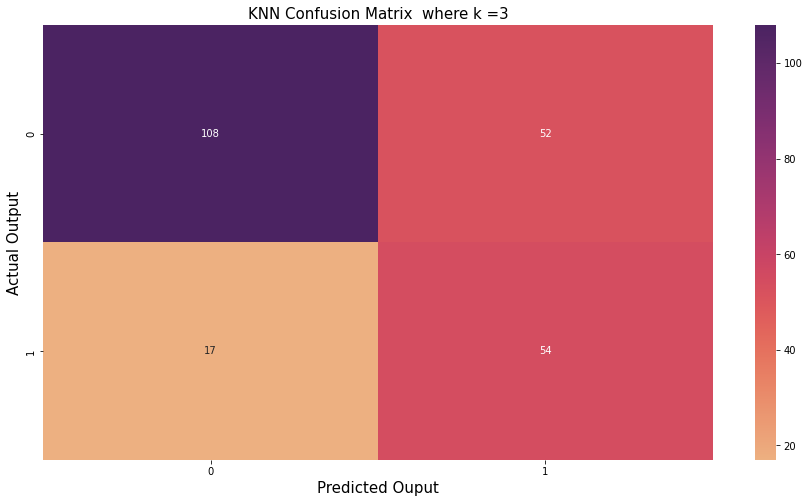

In [ ]:
plt.figure(figsize=(15,8))
zx = sns. heatmap(conf_matrix, cmap ='flare', annot= True, fmt = 'd')
plt.title('KNN Confusion Matrix  where k =3', fontsize= 15)
plt.xlabel('Predicted Ouput', fontsize =15)
plt.ylabel('Actual Output', fontsize =15)
plt.show()

In [ ]:
#   using  n_neighbors = 5
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k='all')
X_train_fs = selector.fit_transform(X_train_sc, y_train_oversampled)
X_test_fs = selector.transform(X_test_sc)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model =KNeighborsClassifier(n_neighbors = 5, metric='minkowski', p=2)
model.fit(X_train_fs, y_train_oversampled)
y_prediction = model.predict(X_test_fs)
print(y_prediction)

[1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0
 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1
 1 1 0 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 0
 1 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1
 1 0 1 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0 1 1
 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 0 0 1]


In [ ]:
from sklearn import metrics
Accuracy = metrics.accuracy_score(y_test, y_prediction)
print('Accuracy score:%.2f\n\n'%(Accuracy))
conf_matrix = metrics.confusion_matrix(y_test, y_prediction)
print('The confusion matrix is:')
print(conf_matrix,'\n\n')
print('---------------------')
result = metrics.classification_report(y_test, y_prediction)
print('Classification Report:\n')
print(result)

Accuracy score:0.68


The confusion matrix is:
[[97 63]
 [11 60]] 


---------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.61      0.72       160
           1       0.49      0.85      0.62        71

    accuracy                           0.68       231
   macro avg       0.69      0.73      0.67       231
weighted avg       0.77      0.68      0.69       231



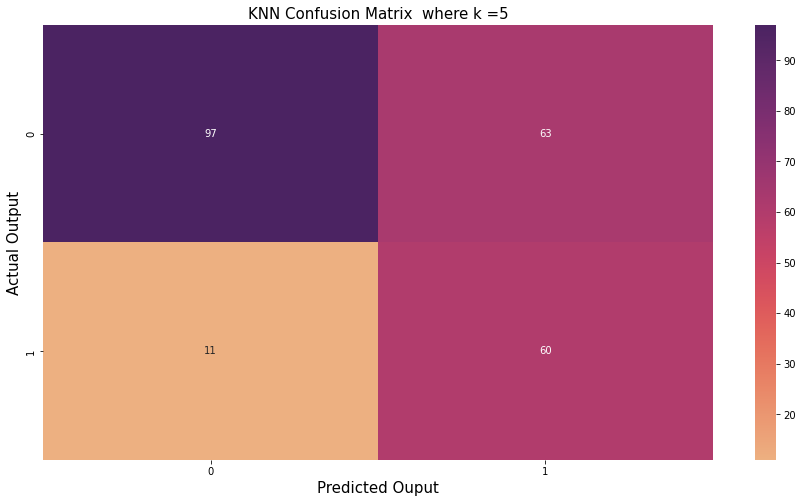

In [ ]:


plt.figure(figsize=(15,8))
zx = sns. heatmap(conf_matrix, cmap ='flare', annot= True, fmt = 'd')
plt.title('KNN Confusion Matrix  where k =5', fontsize= 15)
plt.xlabel('Predicted Ouput', fontsize =15)
plt.ylabel('Actual Output', fontsize =15)
plt.show()

In [ ]:
# using n_neighbors = 9

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k='all')
X_train_fs = selector.fit_transform(X_train_sc, y_train_oversampled)
X_test_fs = selector.transform(X_test_sc)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model =KNeighborsClassifier(n_neighbors = 9, metric='minkowski', p=2)
model.fit(X_train_fs, y_train_oversampled)
y_prediction = model.predict(X_test_fs)
print(y_prediction)

[1 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0
 1 0 0 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 0 0 0 0 1 1 1 1 0 0 1
 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0
 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1
 0 0 1 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0 1 1
 0 1 1 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1
 1 1 0 0 1 1 0 0 1]


In [ ]:
from sklearn import metrics
Accuracy = metrics.accuracy_score(y_test, y_prediction)
print('Accuracy score:%.2f\n\n'%(Accuracy))
conf_matrix = metrics.confusion_matrix(y_test, y_prediction)
print('The confusion matrix is:')
print(conf_matrix,'\n\n')
print('---------------------')
result = metrics.classification_report(y_test, y_prediction)
print('Classification Report:\n')
print(result)

Accuracy score:0.71


The confusion matrix is:
[[104  56]
 [ 12  59]] 


---------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.65      0.75       160
           1       0.51      0.83      0.63        71

    accuracy                           0.71       231
   macro avg       0.70      0.74      0.69       231
weighted avg       0.78      0.71      0.72       231



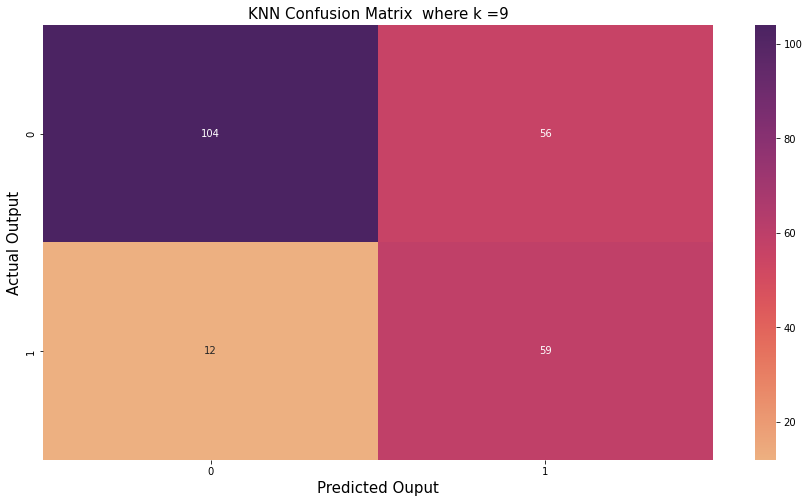

In [ ]:

plt.figure(figsize=(15,8))
zx = sns. heatmap(conf_matrix, cmap ='flare', annot= True, fmt = 'd')
plt.title('KNN Confusion Matrix  where k =9', fontsize= 15)
plt.xlabel('Predicted Ouput', fontsize =15)
plt.ylabel('Actual Output', fontsize =15)
plt.show()

In [ ]:
# Neural Networks

In [ ]:

import tensorflow as tf

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(df[['Glucose','BP','Skin_Thickness','Serum_Insulin','BMI']])
df[['Glucose','BP','Skin_Thickness','Serum_Insulin','BMI']] = imputer.transform(df[['Glucose','BP','Skin_Thickness','Serum_Insulin','BMI']])

In [ ]:
df2 =df

In [ ]:
X = df2.iloc[:, 0:8].values
y = df2.iloc[:, 8].values


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =
0.3, stratify=y, random_state=20)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(8,activation='relu',input_shape=(8,)))
model.add(tf.keras.layers.Dense(2,activation='sigmoid'))


In [ ]:
model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics='accuracy')

In [ ]:
# summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 2)                 18        
                                                                 
Total params: 90
Trainable params: 90
Non-trainable params: 0
_________________________________________________________________


In [ ]:
class_weights = {0:1, 1:2}
history = model.fit(X_train, y_train, \
 batch_size = 8, epochs= 50, \
 verbose=2, class_weight=class_weights, \
 validation_split=0.3)

Epoch 1/50
47/47 - 1s - loss: 1.1602 - accuracy: 0.4907 - val_loss: 0.8507 - val_accuracy: 0.4815 - 1s/epoch - 27ms/step
Epoch 2/50
47/47 - 0s - loss: 1.0548 - accuracy: 0.5253 - val_loss: 0.7803 - val_accuracy: 0.5185 - 180ms/epoch - 4ms/step
Epoch 3/50
47/47 - 0s - loss: 0.9838 - accuracy: 0.5573 - val_loss: 0.7352 - val_accuracy: 0.5494 - 212ms/epoch - 5ms/step
Epoch 4/50
47/47 - 0s - loss: 0.9324 - accuracy: 0.5760 - val_loss: 0.7007 - val_accuracy: 0.5741 - 266ms/epoch - 6ms/step
Epoch 5/50
47/47 - 0s - loss: 0.8933 - accuracy: 0.6027 - val_loss: 0.6725 - val_accuracy: 0.5926 - 157ms/epoch - 3ms/step
Epoch 6/50
47/47 - 0s - loss: 0.8613 - accuracy: 0.6187 - val_loss: 0.6532 - val_accuracy: 0.6173 - 144ms/epoch - 3ms/step
Epoch 7/50
47/47 - 0s - loss: 0.8354 - accuracy: 0.6373 - val_loss: 0.6348 - val_accuracy: 0.6296 - 148ms/epoch - 3ms/step
Epoch 8/50
47/47 - 0s - loss: 0.8156 - accuracy: 0.6373 - val_loss: 0.6233 - val_accuracy: 0.6543 - 151ms/epoch - 3ms/step
Epoch 9/50
47/47 -

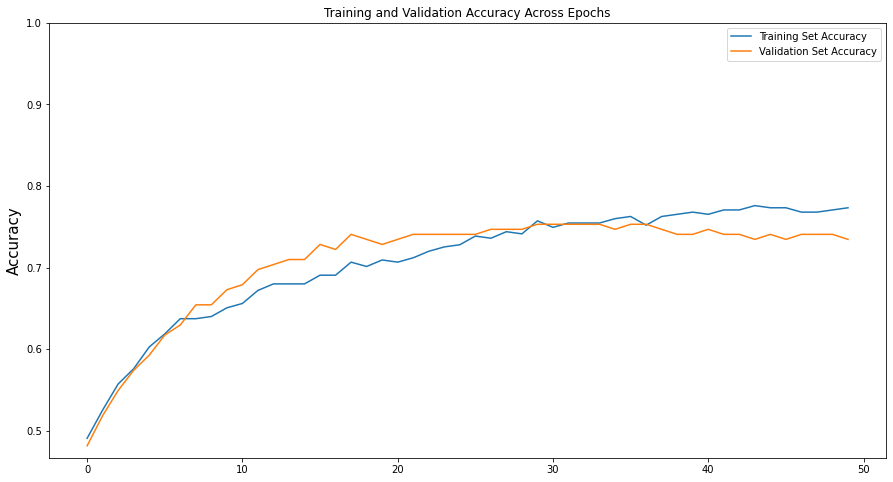

In [ ]:
plt.figure(figsize=(15,8))
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
plt.plot(accuracy, label='Training Set Accuracy')
plt.plot(validation_accuracy, label='Validation Set Accuracy')
plt.ylabel('Accuracy', fontsize=15)
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()


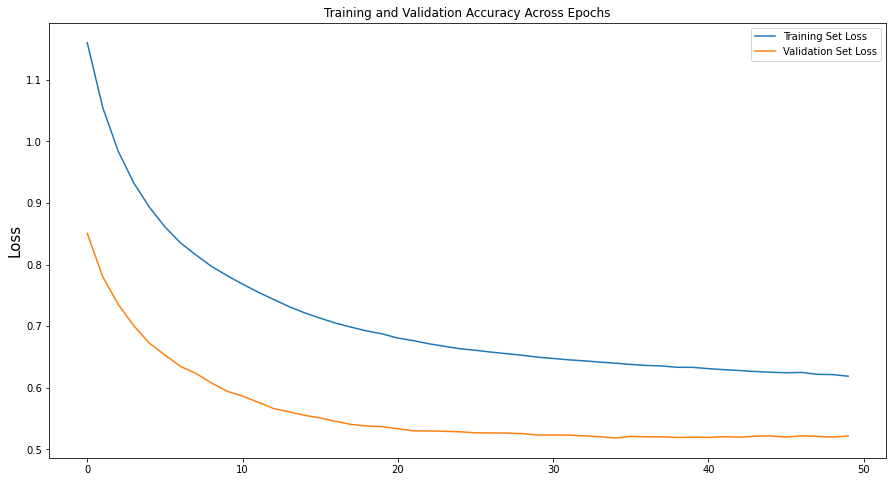

In [ ]:
plt.figure(figsize=(15,8))
loss = history.history['loss']
validation_loss = history.history['val_loss']
plt.plot(loss, label='Training Set Loss')
plt.plot(validation_loss, label='Validation Set Loss')
plt.ylabel('Loss', fontsize=15)
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report


8/8 [==============================] - 0s 6ms/step


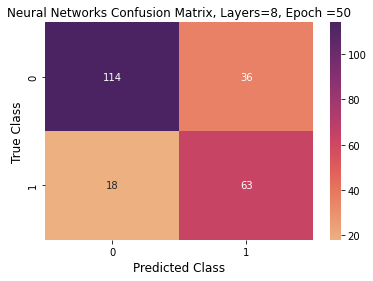

              precision    recall  f1-score   support

           0       0.86      0.76      0.81       150
           1       0.64      0.78      0.70        81

    accuracy                           0.77       231
   macro avg       0.75      0.77      0.75       231
weighted avg       0.78      0.77      0.77       231



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)

confusion_matrix = confusion_matrix(y_test,y_pred)
ax = sns.heatmap(confusion_matrix, cmap='flare',annot=True, fmt='d')
plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Neural Networks Confusion Matrix, Layers=8, Epoch =50",fontsize=12)
plt.show()

print(classification_report(y_test,y_pred))

8/8 [==============================] - 0s 2ms/step


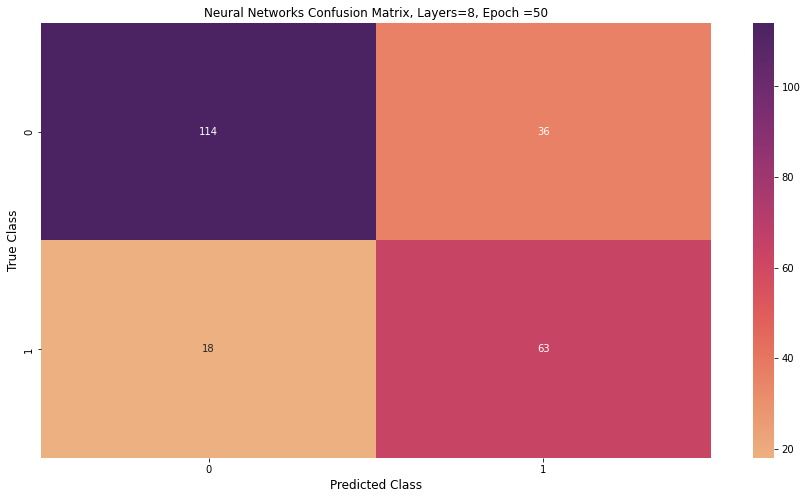

              precision    recall  f1-score   support

           0       0.86      0.76      0.81       150
           1       0.64      0.78      0.70        81

    accuracy                           0.77       231
   macro avg       0.75      0.77      0.75       231
weighted avg       0.78      0.77      0.77       231



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)

confusion_matrix = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(15,8))
ax = sns.heatmap(confusion_matrix, cmap='flare',annot=True, fmt='d')
plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Neural Networks Confusion Matrix, Layers=8, Epoch =50",fontsize=12)
plt.show()

print(classification_report(y_test,y_pred))

In [ ]:
# Let us increase the change the number of layers to 15 and keep epoch at 50

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =
0.3, stratify=y, random_state=20)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(15,activation='relu',input_shape=(8,)))
model.add(tf.keras.layers.Dense(2,activation='sigmoid'))

model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics='accuracy')

class_weights = {0:1, 1:2}
history = model.fit(X_train, y_train, \
 batch_size = 15, epochs= 50, \
 verbose=2, class_weight=class_weights, \
 validation_split=0.3)



Epoch 1/50
25/25 - 1s - loss: 0.9045 - accuracy: 0.6320 - val_loss: 0.6209 - val_accuracy: 0.6790 - 599ms/epoch - 24ms/step
Epoch 2/50
25/25 - 0s - loss: 0.8588 - accuracy: 0.6560 - val_loss: 0.6125 - val_accuracy: 0.7037 - 69ms/epoch - 3ms/step
Epoch 3/50
25/25 - 0s - loss: 0.8250 - accuracy: 0.6880 - val_loss: 0.5987 - val_accuracy: 0.7099 - 71ms/epoch - 3ms/step
Epoch 4/50
25/25 - 0s - loss: 0.8005 - accuracy: 0.6960 - val_loss: 0.5875 - val_accuracy: 0.7160 - 69ms/epoch - 3ms/step
Epoch 5/50
25/25 - 0s - loss: 0.7813 - accuracy: 0.7040 - val_loss: 0.5739 - val_accuracy: 0.7284 - 75ms/epoch - 3ms/step
Epoch 6/50
25/25 - 0s - loss: 0.7640 - accuracy: 0.7093 - val_loss: 0.5695 - val_accuracy: 0.7346 - 76ms/epoch - 3ms/step
Epoch 7/50
25/25 - 0s - loss: 0.7489 - accuracy: 0.7307 - val_loss: 0.5569 - val_accuracy: 0.7284 - 71ms/epoch - 3ms/step
Epoch 8/50
25/25 - 0s - loss: 0.7356 - accuracy: 0.7387 - val_loss: 0.5521 - val_accuracy: 0.7222 - 75ms/epoch - 3ms/step
Epoch 9/50
25/25 - 0s 

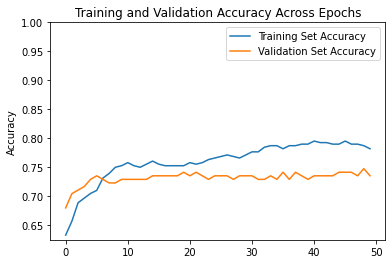

In [ ]:
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
plt.plot(accuracy, label='Training Set Accuracy')
plt.plot(validation_accuracy, label='Validation Set Accuracy')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()






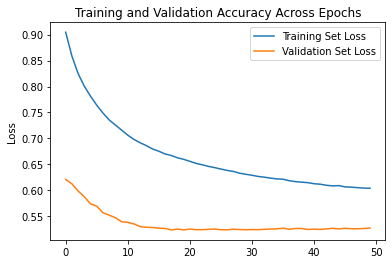

In [ ]:
loss = history.history['loss']
validation_loss = history.history['val_loss']
plt.plot(loss, label='Training Set Loss')
plt.plot(validation_loss, label='Validation Set Loss')
plt.ylabel('Loss')
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()

8/8 [==============================] - 0s 2ms/step


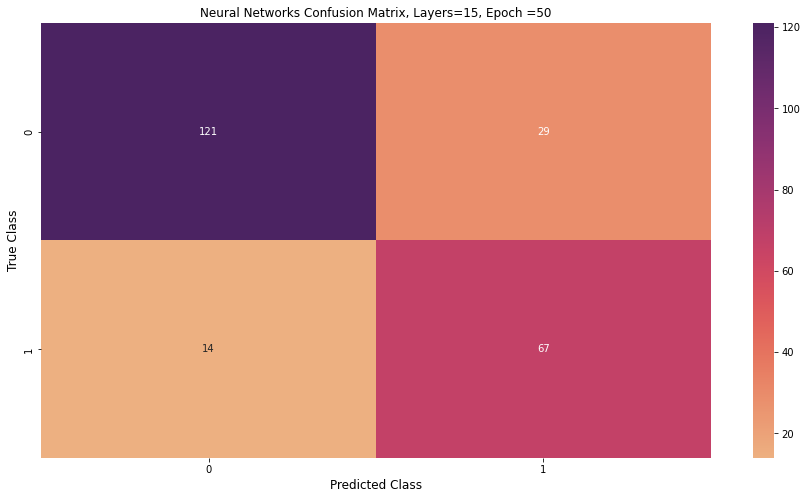

              precision    recall  f1-score   support

           0       0.90      0.81      0.85       150
           1       0.70      0.83      0.76        81

    accuracy                           0.81       231
   macro avg       0.80      0.82      0.80       231
weighted avg       0.83      0.81      0.82       231



In [ ]:


from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)

confusion_matrix = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(15,8))
ax = sns.heatmap(confusion_matrix, cmap='flare',annot=True, fmt='d')
plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Neural Networks Confusion Matrix, Layers=15, Epoch =50",fontsize=12)
plt.show()

print(classification_report(y_test,y_pred))


In [ ]:
#using epoch 0f 100 and 8 hidden layers
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =
0.3, stratify=y, random_state=20)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(8,activation='relu',input_shape=(8,)))
model.add(tf.keras.layers.Dense(2,activation='sigmoid'))

model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics='accuracy')

class_weights = {0:1, 1:2}
history = model.fit(X_train, y_train, \
 batch_size = 15, epochs= 100, \
 verbose=2, class_weight=class_weights, \
 validation_split=0.3)



Epoch 1/100
25/25 - 1s - loss: 1.0576 - accuracy: 0.3840 - val_loss: 0.8199 - val_accuracy: 0.4321 - 598ms/epoch - 24ms/step
Epoch 2/100
25/25 - 0s - loss: 0.9883 - accuracy: 0.4560 - val_loss: 0.7587 - val_accuracy: 0.5000 - 73ms/epoch - 3ms/step
Epoch 3/100
25/25 - 0s - loss: 0.9379 - accuracy: 0.5227 - val_loss: 0.7158 - val_accuracy: 0.5802 - 76ms/epoch - 3ms/step
Epoch 4/100
25/25 - 0s - loss: 0.8984 - accuracy: 0.5760 - val_loss: 0.6811 - val_accuracy: 0.6111 - 70ms/epoch - 3ms/step
Epoch 5/100
25/25 - 0s - loss: 0.8684 - accuracy: 0.6027 - val_loss: 0.6514 - val_accuracy: 0.6420 - 73ms/epoch - 3ms/step
Epoch 6/100
25/25 - 0s - loss: 0.8441 - accuracy: 0.6267 - val_loss: 0.6304 - val_accuracy: 0.6543 - 76ms/epoch - 3ms/step
Epoch 7/100
25/25 - 0s - loss: 0.8238 - accuracy: 0.6453 - val_loss: 0.6150 - val_accuracy: 0.6790 - 80ms/epoch - 3ms/step
Epoch 8/100
25/25 - 0s - loss: 0.8081 - accuracy: 0.6560 - val_loss: 0.6006 - val_accuracy: 0.6790 - 77ms/epoch - 3ms/step
Epoch 9/100
25

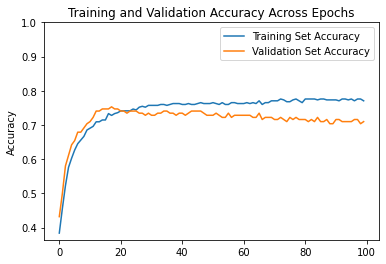

In [ ]:
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
plt.plot(accuracy, label='Training Set Accuracy')
plt.plot(validation_accuracy, label='Validation Set Accuracy')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()

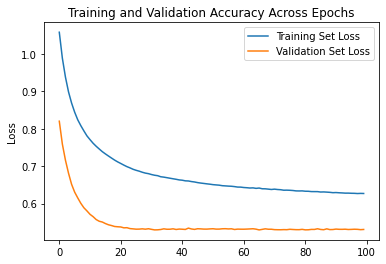

In [ ]:
loss = history.history['loss']
validation_loss = history.history['val_loss']
plt.plot(loss, label='Training Set Loss')
plt.plot(validation_loss, label='Validation Set Loss')
plt.ylabel('Loss')
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()

8/8 [==============================] - 0s 2ms/step


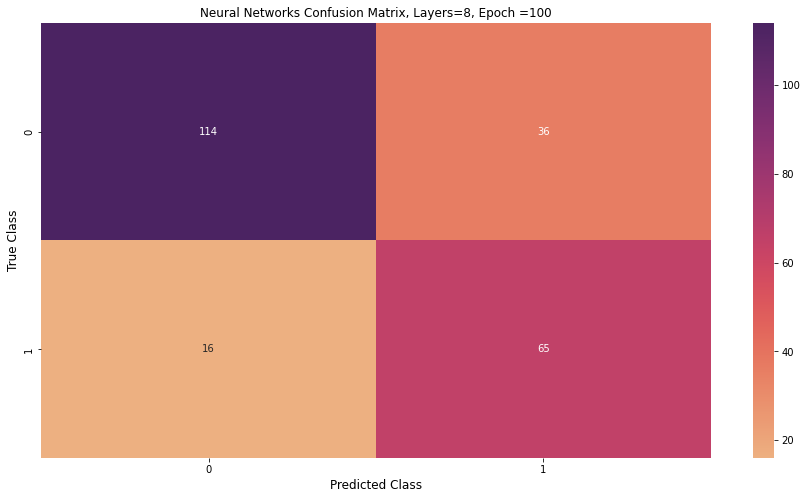

              precision    recall  f1-score   support

           0       0.88      0.76      0.81       150
           1       0.64      0.80      0.71        81

    accuracy                           0.77       231
   macro avg       0.76      0.78      0.76       231
weighted avg       0.80      0.77      0.78       231



In [ ]:


from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)

confusion_matrix = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(15,8))
ax = sns.heatmap(confusion_matrix, cmap='flare',annot=True, fmt='d')
plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Neural Networks Confusion Matrix, Layers=8, Epoch =100",fontsize=12)
plt.show()

print(classification_report(y_test,y_pred))


In [ ]:
#using epoch 0f 100 and 15 hidden layers
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =
0.3, stratify=y, random_state=20)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(15,activation='relu',input_shape=(8,)))
model.add(tf.keras.layers.Dense(2,activation='sigmoid'))

model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics='accuracy')

class_weights = {0:1, 1:2}
history = model.fit(X_train, y_train, \
 batch_size = 15, epochs= 100, \
 verbose=2, class_weight=class_weights, \
 validation_split=0.3)


Epoch 1/100
25/25 - 1s - loss: 1.4209 - accuracy: 0.3680 - val_loss: 1.0337 - val_accuracy: 0.3765 - 585ms/epoch - 23ms/step
Epoch 2/100
25/25 - 0s - loss: 1.2368 - accuracy: 0.4000 - val_loss: 0.8775 - val_accuracy: 0.4383 - 69ms/epoch - 3ms/step
Epoch 3/100
25/25 - 0s - loss: 1.1010 - accuracy: 0.4320 - val_loss: 0.7507 - val_accuracy: 0.5309 - 71ms/epoch - 3ms/step
Epoch 4/100
25/25 - 0s - loss: 0.9980 - accuracy: 0.4960 - val_loss: 0.6672 - val_accuracy: 0.6111 - 67ms/epoch - 3ms/step
Epoch 5/100
25/25 - 0s - loss: 0.9244 - accuracy: 0.5680 - val_loss: 0.6102 - val_accuracy: 0.6667 - 86ms/epoch - 3ms/step
Epoch 6/100
25/25 - 0s - loss: 0.8702 - accuracy: 0.6213 - val_loss: 0.5700 - val_accuracy: 0.7099 - 76ms/epoch - 3ms/step
Epoch 7/100
25/25 - 0s - loss: 0.8298 - accuracy: 0.6560 - val_loss: 0.5473 - val_accuracy: 0.7160 - 74ms/epoch - 3ms/step
Epoch 8/100
25/25 - 0s - loss: 0.7997 - accuracy: 0.6800 - val_loss: 0.5291 - val_accuracy: 0.7284 - 135ms/epoch - 5ms/step
Epoch 9/100
2

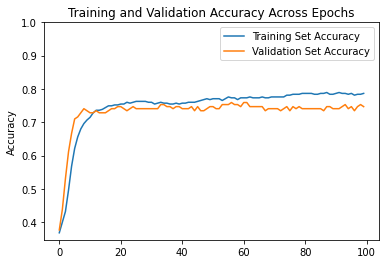

In [ ]:
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
plt.plot(accuracy, label='Training Set Accuracy')
plt.plot(validation_accuracy, label='Validation Set Accuracy')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()

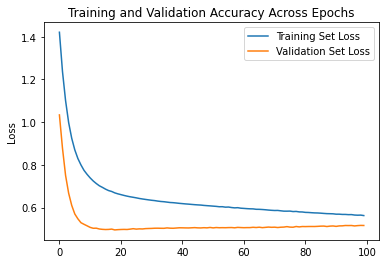

In [ ]:
loss = history.history['loss']
validation_loss = history.history['val_loss']
plt.plot(loss, label='Training Set Loss')
plt.plot(validation_loss, label='Validation Set Loss')
plt.ylabel('Loss')
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()

8/8 [==============================] - 0s 2ms/step


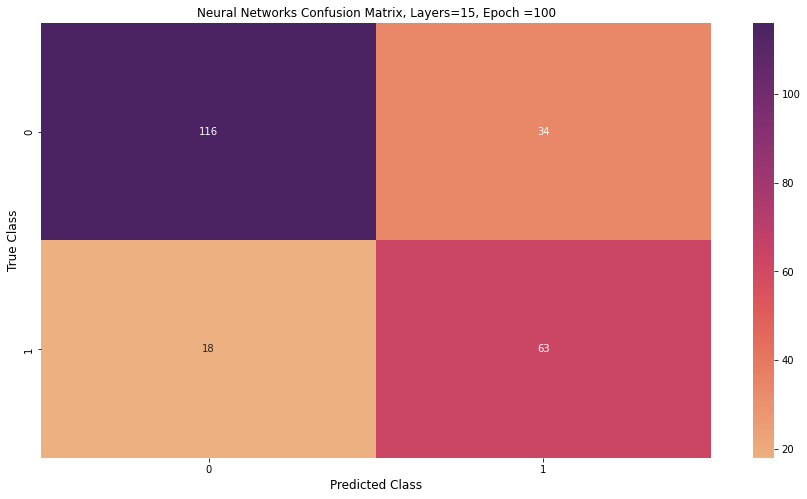

              precision    recall  f1-score   support

           0       0.87      0.77      0.82       150
           1       0.65      0.78      0.71        81

    accuracy                           0.77       231
   macro avg       0.76      0.78      0.76       231
weighted avg       0.79      0.77      0.78       231



In [ ]:

from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)

confusion_matrix = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(15,8))
ax = sns.heatmap(confusion_matrix, cmap='flare',annot=True, fmt='d')
plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Neural Networks Confusion Matrix, Layers=15, Epoch =100",fontsize=12)
plt.show()

print(classification_report(y_test,y_pred))
